In [158]:
# Importing libraries
import numpy as np
import pandas as pd

In [159]:
# Creating variables match and delivery
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [160]:
# Printing match dataframe
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [161]:
# Checking no. of rows/matches played in match dataframe
match.shape

(756, 18)

In [162]:
# Printing delivery dataframe
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [163]:
#
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

<ipython-input-163-2ac27c2c4ebb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [164]:
# Taking only 1st innings
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [165]:
# Printing total_score_df dataframe
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [166]:
# Adding coloumns match_id, totat_runs on right and id on left in match_df dataframe
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [167]:
# Printing match_df dataframe
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [168]:
# Total teams in dataset
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [169]:
# Teams that we need from dataset
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [170]:
# Replacing some old team names
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [171]:
# Print only those teams from both coloumns named team1 and team2 that are needed
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [172]:
# Total no. of matches after selecting nedded team
match_df.shape

(641, 20)

In [173]:
# Keeping only those matches which are not affected my rain
match_df = match_df[match_df['dl_applied'] == 0]

In [174]:
# Taking only this 4 coloumns from match_df dataframe
match_df = match_df[['match_id','city','winner','total_runs']]

In [175]:
# Merging above 4 coloumns with delivery_df on basis of match_id
delivery_df = match_df.merge(delivery,on='match_id')

In [176]:
# Taking only 2nd inning into consideration for prediction
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [177]:
# Printing delivery_df
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [178]:
# Creating a new coloumn/dataframe named current_score
# which gives runs after each ball by using cummalative sum on coloumn name total_runs_y
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

<ipython-input-178-649ac80e49f0>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [179]:
# Creating a new coloumn/dataframe named runs_left
# which gives total runs left after each ball
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [180]:
# Creating a new coloumn/dataframe named balls_left
# which gives total balls left (21 overs * 6 balls = 126) after each ball
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [181]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [182]:
# Replacing string by 0 in coloumn named player_dismissed
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
# If value in coloumn is = 0 then remain as it is, if has some different string then = 1
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
# Convert entire coloumn into integer
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
# Creating a new coloumn/dataframe named wickets
# which gives total wickets left after each ball
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
# Than subtract by 10 to get total wickets left
delivery_df['wickets'] = 10 - wickets
# Printing head of dataframe named delivery_df
delivery_df.head()

<ipython-input-182-ff9792645f14>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [183]:
# Printing tail of dataframe named delivery_df
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-5,0,3


In [184]:
# crr = current score/overs
# Formula to get overs is (120 - delivery_df['balls_left'])/6
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [185]:
# crr = runs left/overs
# Formula to get overs is (120 - delivery_df['balls_left'])/6
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [186]:
# If batting_team = winner then 1 or else 0
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [187]:
# Creating a new coloumn/dataframe named result
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [188]:
# Selecting the coloumns we want in order
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [189]:
# Everything stored in dataframe named final_df and shuffling all the rows/balls
final_df = final_df.sample(final_df.shape[0])

In [209]:
# Checking the table coloumns
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
33707,Rajasthan Royals,Mumbai Indians,Mumbai,212,119,10,212,0.0,10.689076,0


In [191]:
# Dropping missing values from the final_df
final_df.dropna(inplace=True)

In [192]:
# We will take only those balls whose value is not equal to 0
# Because whlie dividing it will give value as infinity
final_df = final_df[final_df['balls_left'] != 0]

In [193]:
# : represents all rows and :-1 represents excluding last coloumn
X = final_df.iloc[:,:-1]
# : represents all rows and -1 represents last coloumn
y = final_df.iloc[:,-1]
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split
# Test size taken is 0.2 and random state is 1
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [194]:
# Printing X_train
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
99969,Kings XI Punjab,Kolkata Knight Riders,Kolkata,62,23,4,163,6.247423,16.173913
126566,Mumbai Indians,Sunrisers Hyderabad,Mumbai,41,7,0,130,4.725664,35.142857
55217,Mumbai Indians,Kings XI Punjab,Chandigarh,130,84,7,163,5.500000,9.285714
140272,Kolkata Knight Riders,Rajasthan Royals,Jaipur,140,115,10,150,12.000000,7.304348
128434,Mumbai Indians,Royal Challengers Bangalore,Bengaluru,144,96,7,173,7.250000,9.000000
...,...,...,...,...,...,...,...,...,...
121383,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,182,101,10,208,8.210526,10.811881
49967,Kolkata Knight Riders,Rajasthan Royals,Jaipur,4,14,9,159,8.773585,1.714286
241,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,43,8,2,207,8.785714,32.250000
122634,Chennai Super Kings,Kolkata Knight Riders,Chennai,104,48,7,207,8.583333,13.000000


In [195]:
# Using One Hot Encoding to transform strings into numbers/integers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Using the command of ColumnTransformer
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [196]:
# Importing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [197]:
# Creating a pipeline to build our model in which :
# Step 1 is transforming of data through one hot encoding
# Step 2 is applying logistic regression
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
# If you want to train with the help of RandomForestClassifier
#   ('step2',RandomForestClassifier())
# We will use random forest when we want to predict whether a single team will win or not.
# but we use logistic regression when to predict both teams outcomes.
])

In [198]:
# Training of model
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [199]:
# Calculating y_pred
y_pred = pipe.predict(X_test)

In [200]:
# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8037003293853809

In [201]:
# Checkin the probability of winning
# Here if we use random forest than there are chances of biasnes because showing 1 value greater in comparision to another
pipe.predict_proba(X_test)[10]

array([0.10685799, 0.89314201])

In [202]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [203]:
# Defining a function match_progression to see all scenarios for a given match
# It will calculate winning probability of each team after every over
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [204]:
# We are using the above function match_progression
# Checking the probability of match no. 74
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df
# The target by the 1st team was 178
# The table shows the performance of chasing team

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,58.2,41.8
10467,2,8,0,52.9,47.1
10473,3,1,0,59.5,40.5
10479,4,7,1,70.9,29.1
10485,5,12,0,61.0,39.0
10491,6,13,0,48.8,51.2
10497,7,9,0,42.8,57.2
10505,8,15,0,28.8,71.2
10511,9,7,0,26.6,73.4
10518,10,17,0,14.7,85.3


Text(0.5, 1.0, 'Target-178')

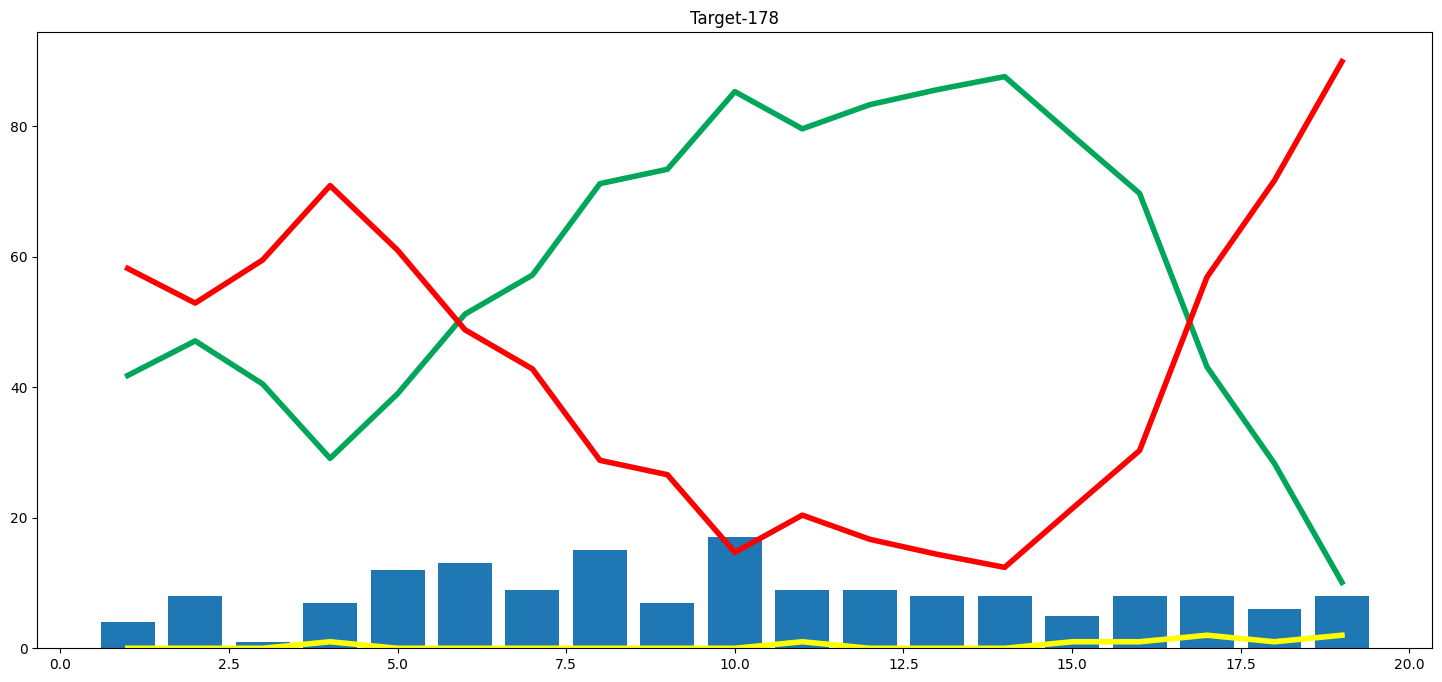

In [205]:
# The above table/date is taken and plotted into graph
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
# Yellow line in the graph
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=4)
# Indicates winning probability - green line in the graph
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
# Indicates lossing probability - red line in the graph
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
# Blue bar graph indicates runs in each over
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [206]:
# Now creating a web application/interface, so for that :
# Display all team names
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [207]:
# Display all City names
# We use unique to display city names only once i.e. which are not repeating names
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [208]:
# Generating a pickle file
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

Advantage/Usage :
By this model one can study matches in detail.